In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [6]:
# Create a scaled validation set and train set
# First 5000 rows as the validation set
#  
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
X_valid.shape

(5000, 28, 28)

In [8]:
X_train.shape

(55000, 28, 28)

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
print(y_train)
class_names[y_train[0]]
np.unique(y_train,True)

[4 0 7 ... 3 0 5]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 1, 11, 18,  8,  0, 30, 13,  2, 12,  3]))

In [12]:
#creates a Sequential model.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

The 'Flatten' type of layer will reshape the input into a 1D array. This is equivalent to computing X.reshape(-1,1) if say input is X

Other option is to use
tf.keras.layers.InputLayer(
    input_shape=None, batch_size=None, dtype=None, input_tensor=None,sparse=False,name=None, ragged=False, **kwargs)

For our case, it would be :
model.add(keras.layers.InputLayer(shape=[28,28]))


We now have 784 basic neurons in the Input layer, one for each of the 784 features, so let us choose the further layers / hidden layer(s).

To begin with we have added say 300 neurons in the first layer and 100 in the second layer.
ReLU activation function is used. 
The last layer is the softmax layer, as we have multi-class output requirement.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Non-trainable Parameters : Currently out of scope. To be discussed later.

Alternate SYntax 

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.layers

In [15]:
model.layers[0].name
model.layers[1].name
model.layers[2].name
model.layers[3].name

'dense_2'

In [16]:
w,b = model.layers[2].get_weights()

In [17]:
w.shape

(300, 100)

In [18]:
b.shape

(100,)

In [19]:
model.compile(loss="sparse_categorical_crossentropy",  #"sparse_categorical_crossentropy",
optimizer="sgd", #"sgd",
metrics=["accuracy"]) # could be a custom function as well!

Refer the documentation of the compile method at this link:
https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

In [20]:
fithistory = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7413 - accuracy: 0.7589 - val_loss: 0.5315 - val_accuracy: 0.8152
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4917 - accuracy: 0.8281 - val_loss: 0.4515 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4457 - accuracy: 0.8438 - val_loss: 0.4286 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4186 - accuracy: 0.8520 - val_loss: 0.4178 - val_accuracy: 0.8586
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3984 - accuracy: 0.8607 - val_loss: 0.4105 - val_accuracy: 0.8586
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3836 - accuracy: 0.8649 - val_loss: 0.3745 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3694 - accuracy: 0.8697 - val_loss: 0.3782 - val_accuracy:

In [21]:
fithistory.epoch # Lists the epochs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [22]:
fithistory.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [23]:
fithistory.history

{'accuracy': [0.7589091062545776,
  0.828072726726532,
  0.843818187713623,
  0.8519999980926514,
  0.8607090711593628,
  0.8648727536201477,
  0.8696545362472534,
  0.8742181658744812,
  0.8770363926887512,
  0.8799818158149719,
  0.8829091191291809,
  0.8864363431930542,
  0.8875636458396912,
  0.8907272815704346,
  0.8916545510292053,
  0.8951091170310974,
  0.8965272903442383,
  0.8986545205116272,
  0.9008363485336304,
  0.9031999707221985,
  0.9043818116188049,
  0.9070909023284912,
  0.9078181982040405,
  0.9101636409759521,
  0.9114909172058105,
  0.9124181866645813,
  0.9141636490821838,
  0.9155091047286987,
  0.9179090857505798,
  0.918327271938324],
 'loss': [0.7413054704666138,
  0.4917384684085846,
  0.44572946429252625,
  0.41856369376182556,
  0.3983749747276306,
  0.3836337625980377,
  0.36935073137283325,
  0.3565503656864166,
  0.34713107347488403,
  0.338035523891449,
  0.32854363322257996,
  0.3194660544395447,
  0.31253018975257874,
  0.304670125246048,
  0.297946

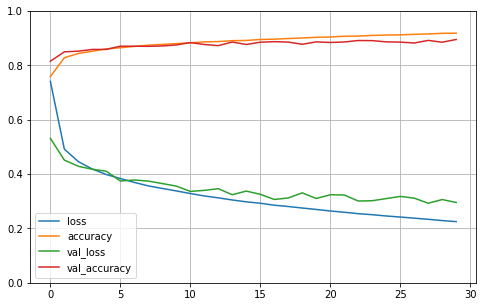

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(fithistory.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [25]:
fithistory.history["accuracy"]

[0.7589091062545776,
 0.828072726726532,
 0.843818187713623,
 0.8519999980926514,
 0.8607090711593628,
 0.8648727536201477,
 0.8696545362472534,
 0.8742181658744812,
 0.8770363926887512,
 0.8799818158149719,
 0.8829091191291809,
 0.8864363431930542,
 0.8875636458396912,
 0.8907272815704346,
 0.8916545510292053,
 0.8951091170310974,
 0.8965272903442383,
 0.8986545205116272,
 0.9008363485336304,
 0.9031999707221985,
 0.9043818116188049,
 0.9070909023284912,
 0.9078181982040405,
 0.9101636409759521,
 0.9114909172058105,
 0.9124181866645813,
 0.9141636490821838,
 0.9155091047286987,
 0.9179090857505798,
 0.918327271938324]

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 75.6242 - accuracy: 0.8308


[75.62415313720703, 0.8307999968528748]

Prediction

In [29]:
X_new = X_test[:5]

In [30]:
y_proba = model.predict(X_new)

In [31]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [32]:
y_pred = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
y_pred

array([9, 2, 1, 1, 6])

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

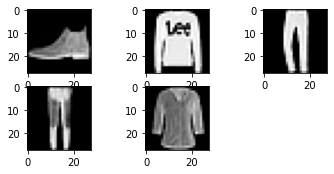

In [38]:
# plot first few images
for i in range(5):
	# define subplot
	plt.subplot(3,3,i+1)
	# plot raw pixel data
	plt.imshow(X_new[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()